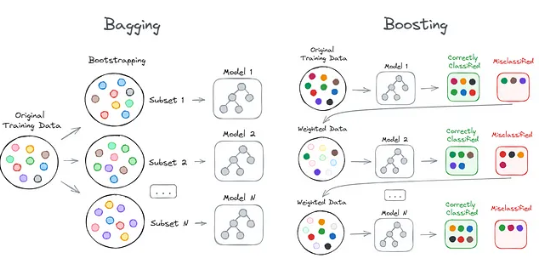

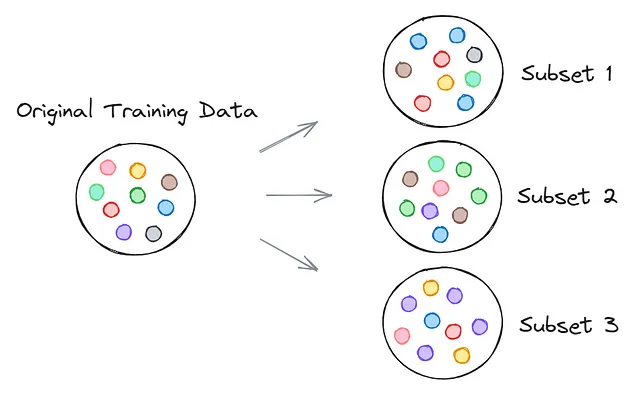

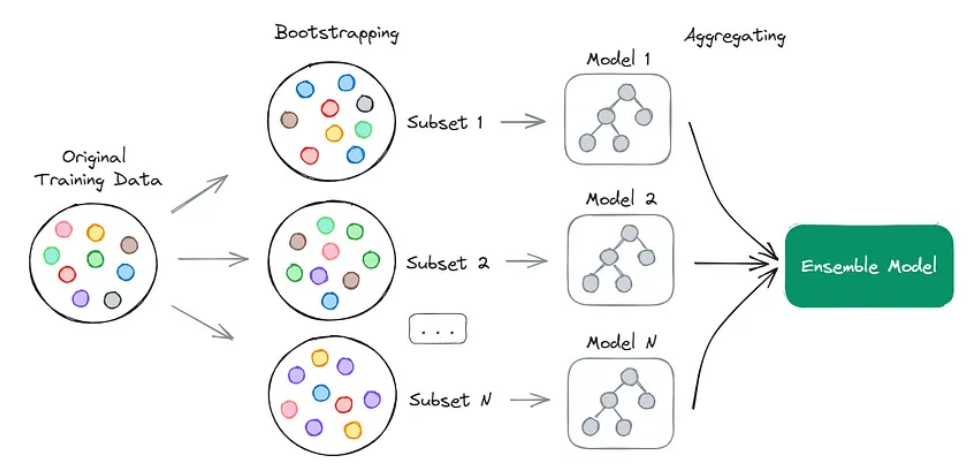

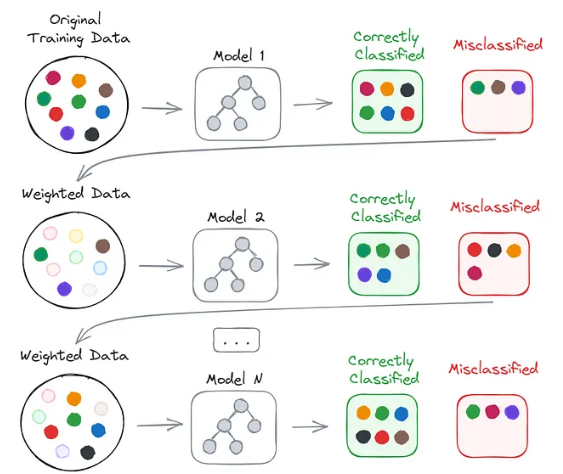

### Implementations of Boosting _Get data and implement the following models

**AdaBoost:** Adaptive boosting, or AdaBoost, starts by training a weak learner on the entire training set. It then evaluates it and assigns it a performance score depending on the model’s error. Next, it trains additional learners on the same dataset but with increased weights for the instances that were misclassified (or suffered from large prediction errors) by the previous learners. Finally, to make a prediction, AdaBoost combines the weak learners with each model’s vote weighted by its performance score.

**Gradient Boosting:** This method is a generalization of boosting to arbitrary differentiable loss functions. Instead of tweaking sample weights like AdaBoost, gradient boosting fits each new learner to the residual errors (differences between the predicted and actual values) of the previous learner. You can think of it as a way of “correcting” the previous learners’ mistakes in the direction that minimally reduces the overall error. Eventually, the predictions of all learners are added up to make a final prediction.

**XGBoost:** Extreme gradient boosting, or XGBoost, is a highly optimized implementation of gradient boosting that is designed to be more efficient and flexible than the standard version. While the steps for training a model are the same as for gradient boosting, it includes additional features such as regularization parameters to prevent overfitting, the ability to handle missing values, and an algorithm that helps to effectively find optimal splits in the data.

 ##
 Modelling
 Heart Disease UCIデータセット

- **入力変数（特徴量）**: 
  - Age (age in years): 患者の年齢（年）
  - Sex (1 = male; 0 = female): 1は男性、0は女性
  - CP (chest pain type): 胸痛のタイプを表す
  - TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital)): 入院時の安静時の血圧（mm Hg）
  - CHOL (serum cholestoral in mg/dl): 血清中のコレステロール濃度（mg/dl）
  - FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false): 空腹時の血糖値が120 mg/dlを超える場合は1、それ以外は0
  - RESTECH (resting electrocardiographic results): 安静時の心電図の結果
  - THALACH (maximum heart rate achieved): 達成された最大の心拍数
  - EXANG (exercise induced angina (1 = yes; 0 = no)): 運動誘発性の狭心症がある場合は1、それ以外は0
  - OLDPEAK (ST depression induced by exercise relative to rest): 安静時に比べて運動によって引き起こされるST低下
  - SLOPE (the slope of the peak exercise ST segment): ピーク運動STセグメントの傾き
  - CA (number of major vessels (0-3) colored by flourosopy): フルオロスコピーによって色付けされた主要な血管の数（0から3まで）
  - THAL (3 = normal; 6 = fixed defect; 7 = reversable defect): 3は正常、6は固定された欠陥、7は可逆的な欠陥
 

- **出力変数（ラベル）**:
  - TARGET (1 or 0): 心臓病の有無を表す（1は有、0は無）

- **モデリングは何のタイプですか？**
  - 教師あり Supervised Learning

- **モデリングの種類は何ですか？**
  - 二項分類 Binary Classification
  

In [1]:
!pip install mlxtend
!pip install xgboost


## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from mlxtend.classifier import StackingCVClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.classifier import StackingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# データ準備
df = pd.read_csv('/Users/ayano/Desktop/Data Science & AI/csv/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#Meaningless?

# Domains, Intervals
print('- Domains, Intervals')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print('+ %-27s: (%-s)' % (c, df[c].dtypes.name))

    if df[c].dtypes.name != 'object':
        print('  min: %d, max: %d' % (df[c].min(), df[c].max()))
    print('  values: %s' % x)

- Domains, Intervals
+ age                        : (int64)
  min: 29, max: 77
  values: [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
+ sex                        : (int64)
  min: 0, max: 1
  values: [0 1]
+ cp                         : (int64)
  min: 0, max: 3
  values: [0 1 2 3]
+ trestbps                   : (int64)
  min: 94, max: 200
  values: [ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]
+ chol                       : (int64)
  min: 126, max: 564
  values: [126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 2

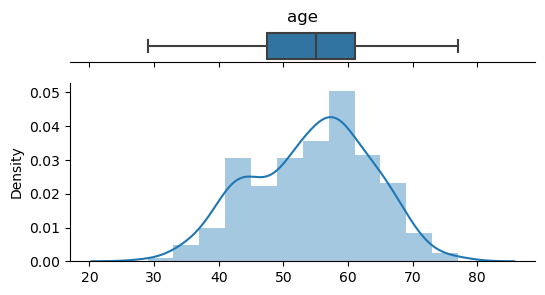

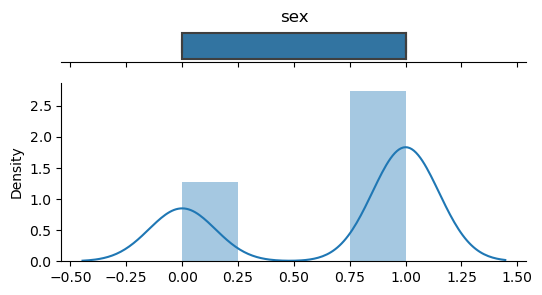

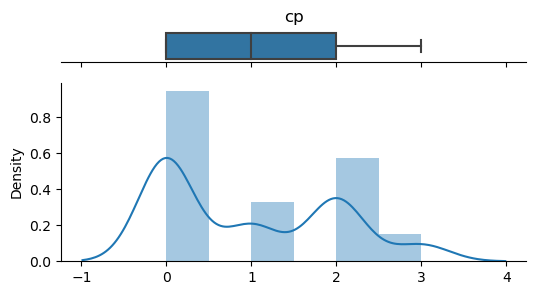

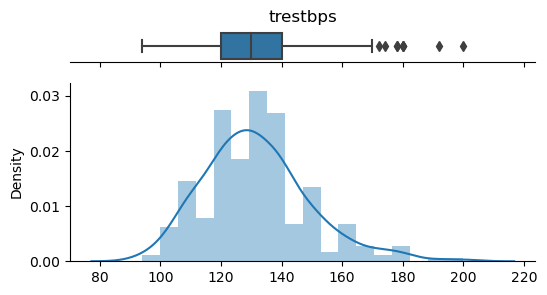

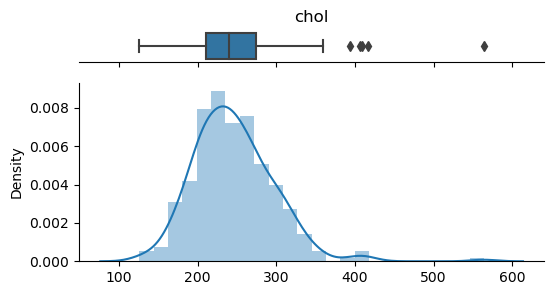

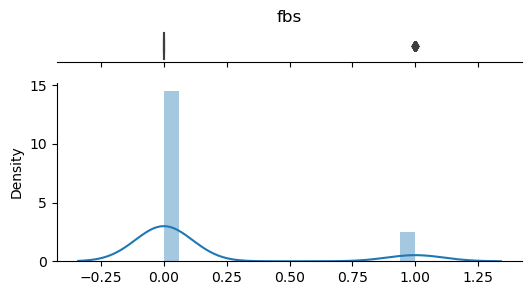

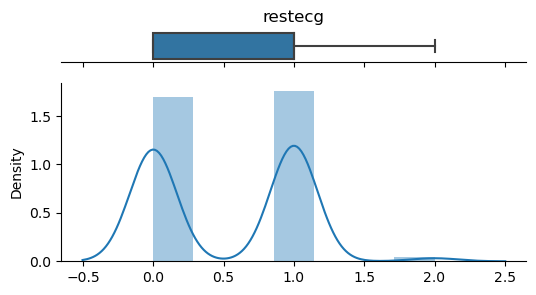

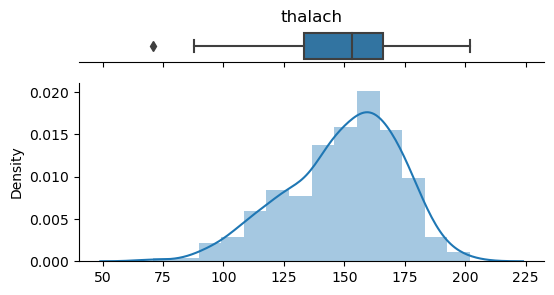

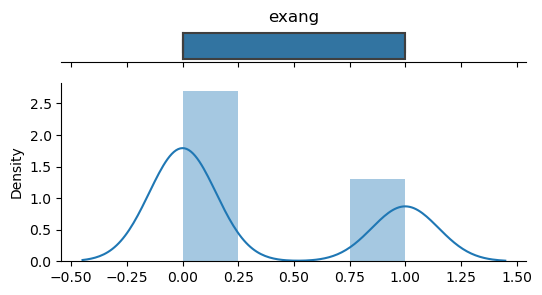

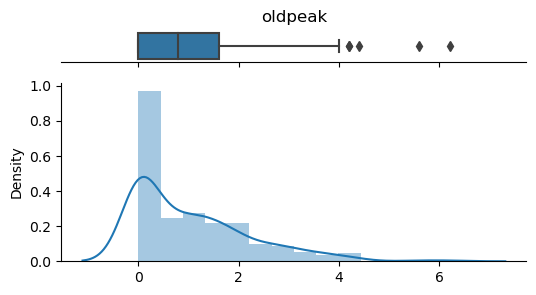

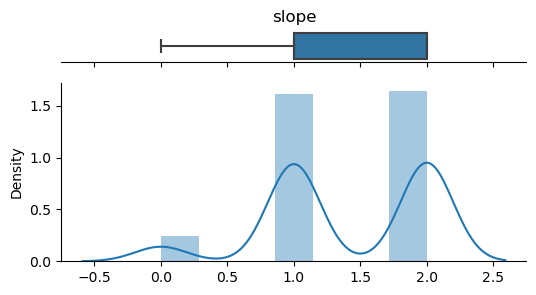

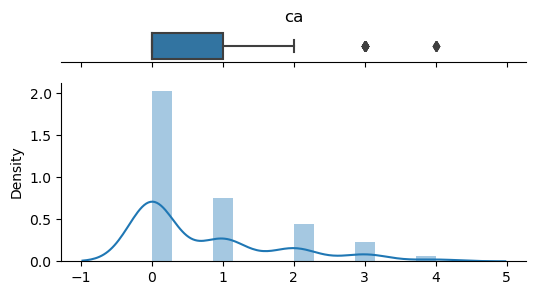

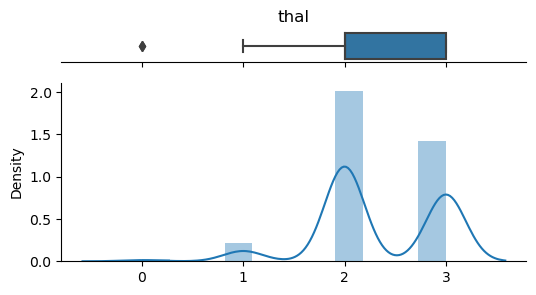

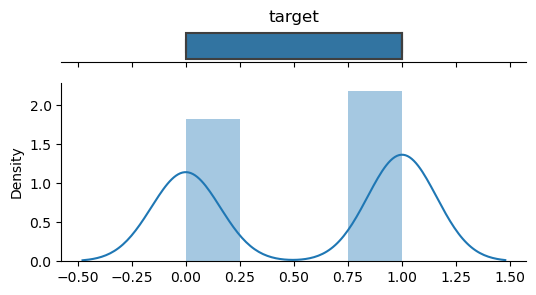

In [7]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize=(6,3),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box, orient="h")
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

### X, y

In [8]:
# X, yを作成
X = df.drop('target',axis=1)
y = df["target"]

In [9]:
# データフレームから列名を取得
columns = df.columns

# 特徴量として使う列（最初と最後の列以外）
features = columns[1:-1]

# 出力変数として使う列
outcome = 'target'


In [10]:
# データを確認

# About X
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [11]:
X.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3


In [12]:
# About y
y.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [13]:
y.sample(5)

182    0
120    1
290    0
52     1
213    0
Name: target, dtype: int64

### Pearson Correlation Heatmap

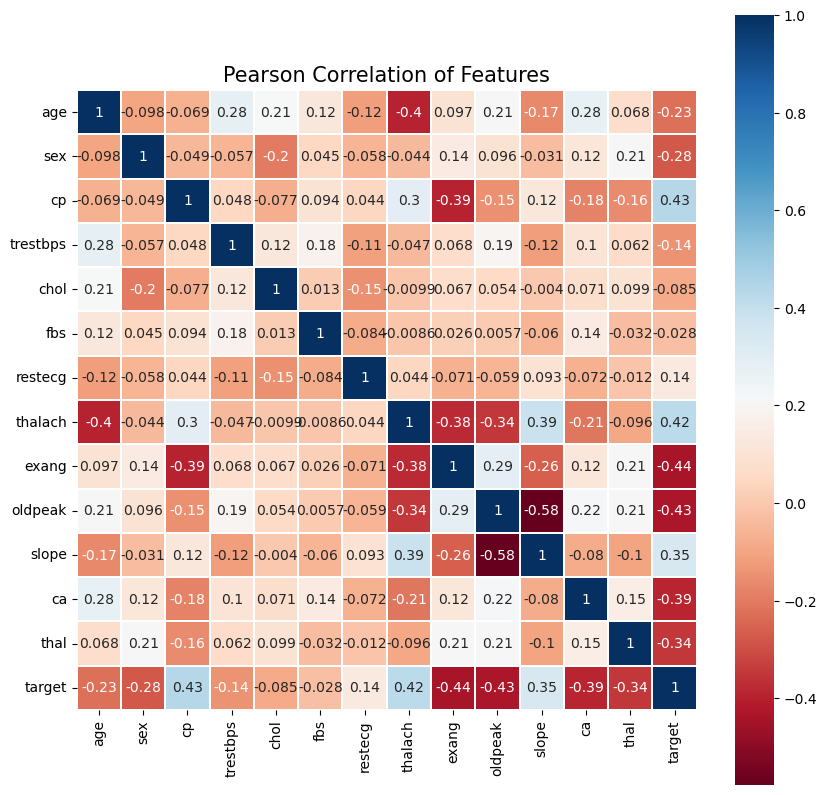

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize = (10, 10))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(df.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show()

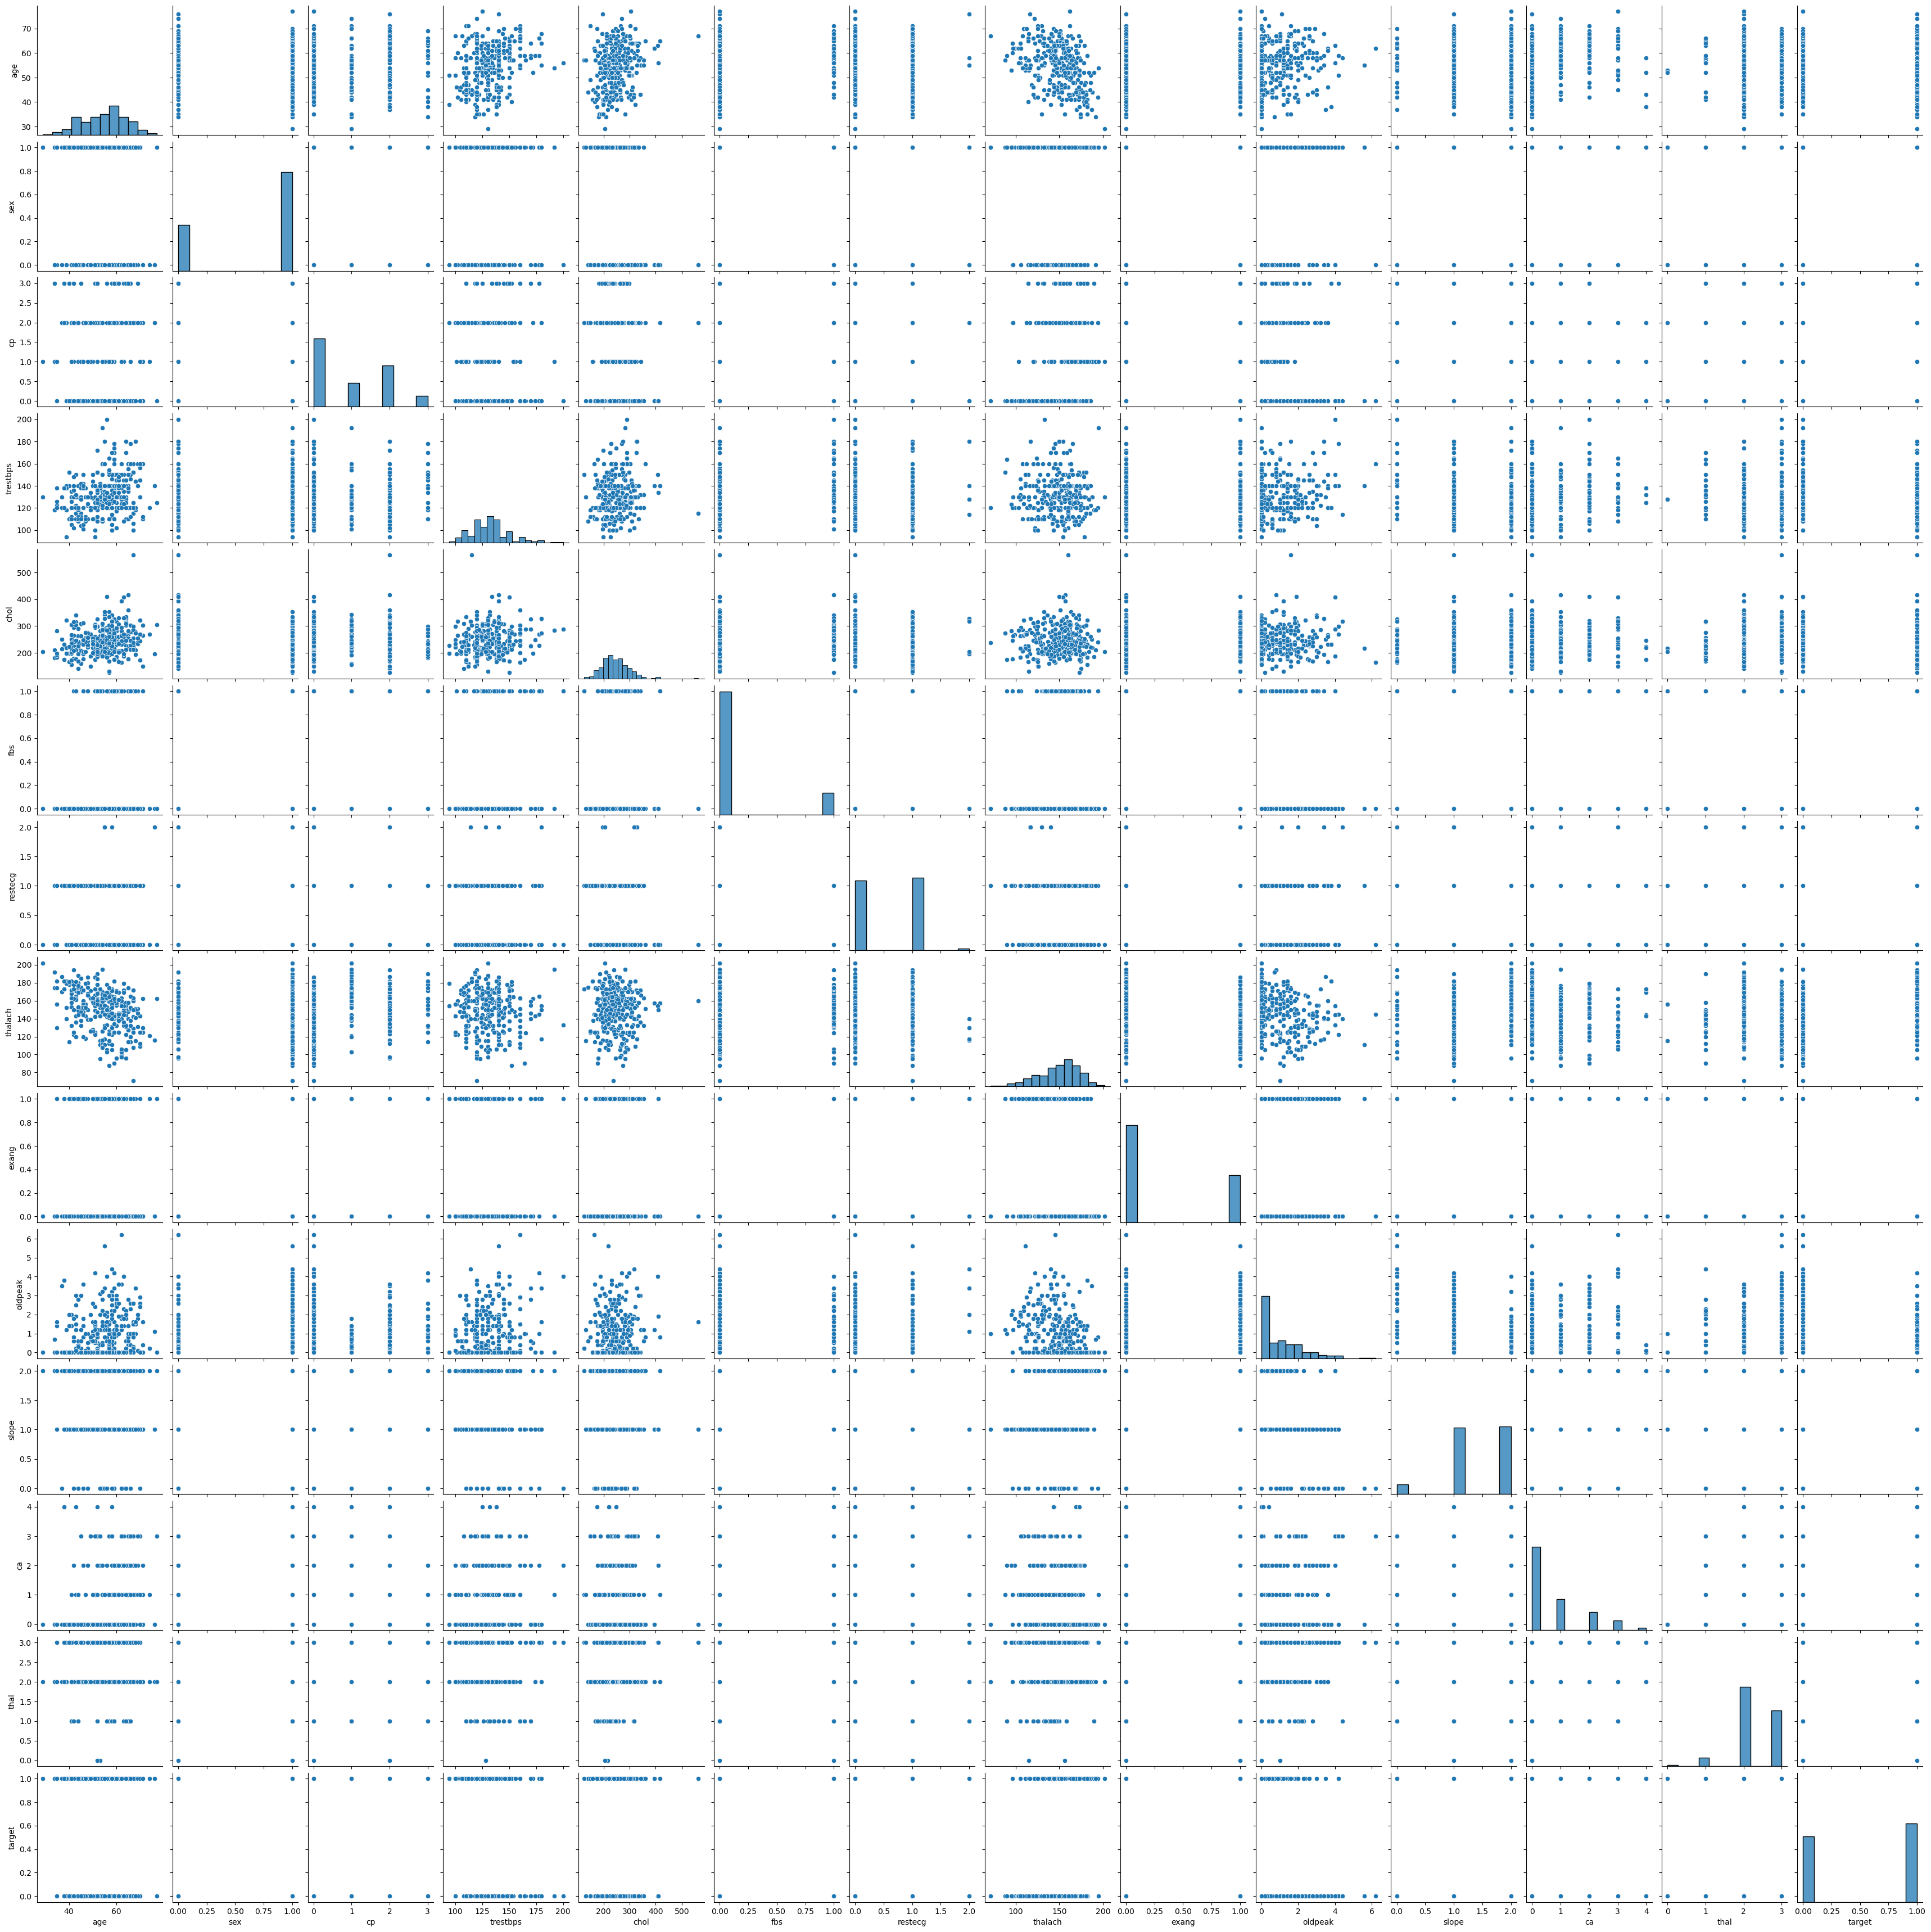

In [15]:
## Visualise the data points

# visualise features in pairs
sns.pairplot(df)
plt.show()

In [16]:
print('- What are the input variables (features)?')
print('  - %s' % ', '.join(features))
print('- Is there an output variable (label)?')
print('  - %s' % ('Yes' if outcome else 'No'))
print('- If there is an output variable:')
print('    - Which one is it?')
print('      - %s' % outcome)
print('    - What is its type?')
print('      - %s' % y.dtypes)
print('  - What type of Modelling is it?')
print('    - [%s] Supervised' % ('x' if outcome else ' '))
print('    - [%s] Unsupervised' % (' ' if outcome else 'x'))
print('  - What type of Modelling is it?')
print('    - [%s] Regression' % ('x' if (y.dtypes != 'object') & (len(y.unique()) >= 20) else ' '))
print('    - [%s] Classification (binary)' % ('x' if len(y.unique()) == 2 else ' '))
print('    - [%s] Classification (multi-class)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) != 2) else ' '))
print('    - [%s] Clustering' % (' ' if outcome else 'x'))

- What are the input variables (features)?
  - sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
- Is there an output variable (label)?
  - Yes
- If there is an output variable:
    - Which one is it?
      - target
    - What is its type?
      - int64
  - What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised
  - What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


### Train, Test データに分ける

In [38]:
## テストデータに分ける

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

## Bagging

### Logistic Regression

In [39]:
# ロジスティック回帰モデル
lr = LogisticRegression()

# バギングクラシファイアを作成
bagging_model = BaggingClassifier(base_estimator=lr, n_estimators=50, random_state=42)

# バギングモデルをトレーニング
bagging_model.fit(X_train, y_train)

# テストデータで予測
bagging_predict = bagging_model.predict(X_test)

# 混同行列の表示
bagging_conf_matrix = confusion_matrix(y_test, bagging_predict)
print("Confusion matrix:")
print(bagging_conf_matrix)
print("\n")

# 正解率の表示
bagging_acc_score = accuracy_score(y_test, bagging_predict)
print("Accuracy of Bagging Logistic Regression:", bagging_acc_score * 100, '\n')

# 分類レポートの表示
print("Classification Report:")
print(classification_report(y_test, bagging_predict))


Confusion matrix:
[[32  9]
 [ 8 42]]


Accuracy of Bagging Logistic Regression: 81.31868131868131 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [40]:
# 学習と予測
clf = BaggingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

# 評価
print(f"bagging AUC: {roc_auc_score(y_test, y_pred[:, 1])}")

bagging AUC: 0.8768292682926829


### Random Forest

In [41]:
# ランダムフォレストモデル
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# バギングクラシファイアを作成
bagging_model_rf = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)

# バギングモデルをトレーニング
bagging_model_rf.fit(X_train, y_train)

# テストデータで予測
bagging_predict_rf = bagging_model_rf.predict(X_test)

# 混同行列の表示
bagging_conf_matrix_rf = confusion_matrix(y_test, bagging_predict_rf)
print("Confusion matrix:")
print(bagging_conf_matrix_rf)
print("\n")

# 正解率の表示
bagging_acc_score_rf = accuracy_score(y_test, bagging_predict_rf)
print("Accuracy of Bagging Random Forest:", bagging_acc_score_rf * 100, '\n')

# 分類レポートの表示
print("Classification Report:")
print(classification_report(y_test, bagging_predict_rf))


Confusion matrix:
[[32  9]
 [ 9 41]]


Accuracy of Bagging Random Forest: 80.21978021978022 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [42]:
# 学習と予測
rf = RandomForestClassifier(n_estimators=50, max_depth=1, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)

# 評価
print(f"random forest AUC: {roc_auc_score(y_test, y_pred_rf[:, 1])}")

random forest AUC: 0.8926829268292683


### Ada Boost

In [44]:
# AdaBoostモデル
ada_model_base = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(base_estimator=ada_model_base, n_estimators=50, random_state=42)

# バギングモデルをトレーニング
ada_model.fit(X_train, y_train)

# テストデータで予測
ada_predict = ada_model.predict(X_test)

# 混同行列の表示
ada_conf_matrix = confusion_matrix(y_test, ada_predict)
print("Confusion matrix:")
print(ada_conf_matrix)
print("\n")

# 正解率の表示
ada_acc_score = accuracy_score(y_test, ada_predict)
print("Accuracy of AdaBoost:", ada_acc_score * 100, '\n')

# 分類レポートの表示
print("Classification Report:")
print(classification_report(y_test, ada_predict))


Confusion matrix:
[[36  5]
 [13 37]]


Accuracy of AdaBoost: 80.21978021978022 

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.88      0.74      0.80        50

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



In [45]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.01, random_state=42).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f"adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}")

adaboost AUC: 0.8560975609756097


### Gradient Boosting

In [46]:
# モデルのインスタンスを作成
grad_boost_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, max_depth=15, subsample=0.52, random_state=42)

# モデルをトレーニング
grad_boost_model.fit(X_train, y_train)

# テストデータで予測
y_pred_grad_boost = grad_boost_model.predict(X_test)

# 混同行列の表示
grad_boost_conf_matrix = confusion_matrix(y_test, y_pred_grad_boost)
print("Confusion matrix:")
print(grad_boost_conf_matrix)
print("\n")

# 正解率の表示
grad_boost_acc_score = accuracy_score(y_test, y_pred_grad_boost)
print("Accuracy of Gradient Boosting:", grad_boost_acc_score * 100, '\n')

# 分類レポートの表示
print("Classification Report:")
print(classification_report(y_test, y_pred_grad_boost))


Confusion matrix:
[[32  9]
 [ 6 44]]


Accuracy of Gradient Boosting: 83.51648351648352 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [47]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, max_depth=1, random_state=42).fit(X_train, y_train)

# 評価
print(f"grad boost AUC: {roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])}")

grad boost AUC: 0.8748780487804878


### XGBoost

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# モデルのインスタンスを作成
xgb_model = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=50,
    max_depth=15,
    gamma=0.6,
    subsample=0.52,
    colsample_bytree=0.6,
    seed=27,
    reg_lambda=2,
    booster='dart',
    colsample_bylevel=0.6,
    colsample_bynode=0.5,
    random_state=42
)

# モデルをトレーニング
xgb_model.fit(X_train, y_train)

# テストデータで予測
y_pred_xgb = xgb_model.predict(X_test)

# 混同行列の表示
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion matrix:")
print(xgb_conf_matrix)
print("\n")

# 正解率の表示
xgb_acc_score = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of Extreme Gradient Boost (XGBoost):", xgb_acc_score * 100, '\n')

# 分類レポートの表示
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Confusion matrix:
[[31 10]
 [ 2 48]]


Accuracy of Extreme Gradient Boost (XGBoost): 86.81318681318682 

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.83      0.96      0.89        50

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.86        91
weighted avg       0.88      0.87      0.87        91



In [49]:
xgb = XGBClassifier(learning_rate=0.01,
              eval_metric='auc',
              early_stopping_rounds=10,
              importance_type='total_gain',
              random_state=42)
# 学習
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-auc:0.83780
[1]	validation_0-auc:0.83683
[2]	validation_0-auc:0.83293
[3]	validation_0-auc:0.83293
[4]	validation_0-auc:0.83293
[5]	validation_0-auc:0.83293
[6]	validation_0-auc:0.83293
[7]	validation_0-auc:0.83561
[8]	validation_0-auc:0.83561
[9]	validation_0-auc:0.83561
[10]	validation_0-auc:0.83561


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
# 予測と評価
y_pred_xgb = xgb.predict_proba(X_test)
print(f"xgboost AUC: {roc_auc_score(y_test, y_pred_xgb[:, 1])}")


xgboost AUC: 0.8378048780487805


### Stacking

In [82]:
# StackingCVClassifierを定義
scv = StackingCVClassifier(
    classifiers=[ada_model, grad_boost_model, xgb_model],
    meta_classifier=LogisticRegression(),
    random_state=42
)

# モデルをトレーニング
scv.fit(X_train, y_train)

# テストデータで予測
scv_predicted = scv.predict(X_test)

# 混同行列の表示
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
print("Confusion matrix:")
print(scv_conf_matrix)
print("\n")

# 正解率の表示
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("Accuracy of StackingCVClassifier:", scv_acc_score * 100, '\n')

# 分類レポートの表示
print("Classification Report:")
print(classification_report(y_test, scv_predicted))


Confusion matrix:
[[32  9]
 [ 8 42]]


Accuracy of StackingCVClassifier: 81.31868131868131 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [85]:
y_pred_scv = scv.predict_proba(X_test)
print(f"StackingCVClassifier AUC: {roc_auc_score(y_test, y_pred_scv[:, 1])}")

StackingCVClassifier AUC: 0.8485365853658536


### Conclusion

In [ ]:
## XG Boost gives the best Accuracy compared to other models.
## Chest pain, Exercise induced angina, the slope of the peak exercise ST segment are major symptoms of heart attack.


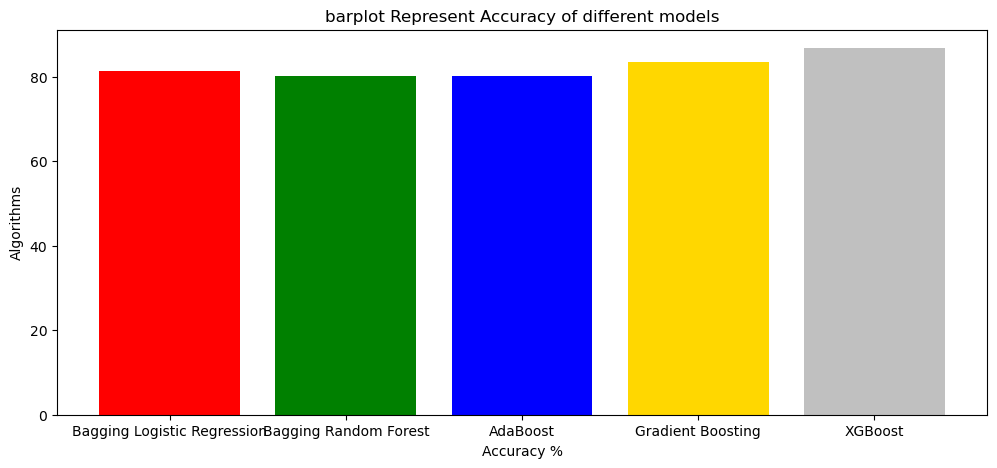

In [90]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [56]:
## Meaningless??


import pandas as pd

# モデル名と対応する精度を持つDataFrameを作成
model_ev = pd.DataFrame({
    'Model': ['Bagging Logistic Regression', 'Bagging Random Forest', 'AdaBoost', 
              'Gradient Boosting', 'XGBoost'],
    'Accuracy': [bagging_acc_score*100, bagging_acc_score_rf*100, ada_acc_score*100,
                 grad_boost_acc_score*100, xgb_acc_score*100],
})

model_ev


,Model,Accuracy
0,Bagging Logistic Regression,81.318681
1,Bagging Random Forest,80.219780
2,AdaBoost,80.219780
3,Gradient Boosting,83.516484
4,XGBoost,86.813187
